In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# Les réseaux à convolutions

Ces réseaux de neurones comprennent deux nouveaux types de couches :
    
- les couches de convolutions
- les couches de pooling

http://scs.ryerson.ca/~aharley/vis/conv/

# Les couches de convolution

La différence fondamentale entre une couche densément connectée et une couche de convolution est la suivante: 

- les couches denses apprennent des motifs globaux dans leur espace de fonctions en entrée (par exemple, pour un chiffre MNIST, des motifs impliquant tous les pixels), tandis que les couches de convolution apprennent des motifs locaux.

Dans le cas des images, des motifs trouvés dans de petites fenêtres 2D des entrées. 

![image](https://github.com/stat4decision/formation-adway-ml-avr2019/blob/master/images/conv.jpg?raw=1)


Cette caractéristique clé confère à convnets deux propriétés intéressantes:

- Les modèles qu’ils apprennent sont des invariants de traduction.

- Ils peuvent apprendre les hiérarchies spatiales des modèles

Les convolutions sont définies par deux paramètres clés:

- Taille des patchs extraits des entrées

- Profondeur de la carte de caractéristiques en sortie

![image](https://github.com/stat4decision/formation-adway-ml-avr2019/blob/master/images/conv2.jpg?raw=1)

# Les couches de pooling

Chaque couche MaxPooling2D permet de réduire la taille des cartes de caractéristiaues. 

C’est le rôle du pooling : sous-échantillonner de manière agressive les cartes de features.

# Un cas concret

Nous allons utiliser notre réseau convnet pour classer les chiffres MNIST.

Les 6 lignes de code ci-dessous vous montrent à quoi ressemble un convnet de base. 


C'est une pile de couches `Conv2D` et` MaxPooling2D`


Il est important de noter qu'un convnet prend en entrée des tenseurs de la forme `(image_height, image_width, image_channels)` 


Dans notre cas, nous allons configurer notre convnet pour traiter des entrées de taille `(28, 28, 1)`, qui est le format des images MNIST. 


Nous faisons cela via l'argument `input_shape = (28, 28, 1)`

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

W0705 15:17:11.513831 140575585077120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 15:17:11.565332 140575585077120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 15:17:11.575600 140575585077120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 15:17:11.616221 140575585077120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Voici son architecture :

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Vous pouvez voir que la sortie de chaque couche `Conv2D` et` MaxPooling2D` est un tenseur 3D de forme `(hauteur, largeur, canaux)`. 


Les dimensions en largeur et en hauteur ont tendance à diminuer à mesure que nous progressons dans le réseau. Le nombre de canaux est contrôlé par le premier argument passé aux couches `Conv2D` (par exemple 32 ou 64).


Nous devons donc aplatir nos sorties 3D sur 1D, puis ajouter quelques couches `Dense` au-dessus:

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

Maintenant, entraînons notre réseau sur les chiffres du MNIST

In [6]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



model.fit(train_images, train_labels, epochs=10, batch_size=128,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1579 - acc: 0.9418 - val_loss: 0.2720 - val_acc: 0.9043
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1451 - acc: 0.9459 - val_loss: 0.2519 - val_acc: 0.9155
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1359 - acc: 0.9496 - val_loss: 0.2876 - val_acc: 0.9095
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1254 - acc: 0.9529 - val_loss: 0.2958 - val_acc: 0.9076
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1167 - acc: 0.9573 - val_loss: 0.2787 - val_acc: 0.9150
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1088 - acc: 0.9591 - val_loss: 0.3043 - val_acc: 0.9117
Epoch 7/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1005 - acc: 0.9621 - val_loss: 0.3001 - val_acc

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 89us/step


In [9]:
test_acc

0.9082

In [18]:
model.predict(test_images[10,].reshape(1,28,28,1))

array([[1.8491994e-08, 9.3746379e-11, 2.0429505e-05, 1.4432024e-11,
        9.9977046e-01, 2.2831218e-11, 2.0900051e-04, 8.7442168e-13,
        5.0325111e-10, 6.8893766e-11]], dtype=float32)

In [0]:
import imageio

In [0]:
import matplotlib.pyplot as plt

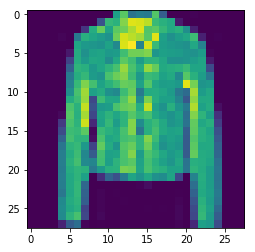

In [19]:
plt.imshow(test_images[10,].reshape(28,28))

In [20]:
test_labels[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)